In [1]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import natsort

In [7]:
class silhouette:
    def __init__(self, path, metric): #tsne/umap
        self.path = path
        self.metric = metric
        #self.algo = algo
    
    def list_dir(self):
        
        list_dir = os.listdir(self.path + '/df_' + self.metric )
        list_dir = [f.lower() for f in list_dir] # Convert to lower case
        list_dir = natsort.natsorted(list_dir)
        print(list_dir)
        return list_dir

    def sil(self):
        list_dir = obj_sil.list_dir()

        silh = np.array([])
        for filename in list_dir:
            if filename.endswith(('.csv')):
                df = pd.read_csv(self.path + '/df_' + self.metric + '/' + filename)
                X = df[["a", "b"]]
                labels = df["c"]
                score = silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None)
                silh = np.append(silh, score)
        return silh
    
    def plot_tsne(self):
        silh = obj_sil.sil()
        #print(silh)
        fig = plt.figure(figsize = (12, 5))
        ax = fig.add_axes([0,0,1,1])
        plt.axis([0, 101, -0.3, 0.3])
        #plt.axhline(y=-0.3,linewidth=1, color='tomato', linestyle = '--')
        per = [*range(1, len(silh)+1, 1)]
        # print(per)
        # print(silh)
        #plt.bar(per, silh, align = 'center', alpha=0.5)
        ax.bar(per, silh, color  = 'teal')
        #ax.ylim(-1, 0)
        ax.set_title("Silhouette scores for t-SNE simulations", fontweight='bold', fontsize = 14)
        ax.set_xlabel("Perplexity", fontweight='bold')
        ax.set_ylabel("Score", fontweight='bold')
        #plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        #ax.grid()
        #ax.figure.savefig('mrna515/t-SNE_silhouette_scores.png', bbox_inches='tight', format = "png", dpi=1200)
        plt.show()
        np.savetxt("tsne_seed22/mirna/sil_tsne.csv", silh, delimiter=",")

    def plot_umap(self):
        silh = obj_sil.sil()

        # list1 = [2, 5, 10, 15, 20, 30, 40, 50]
        # list2 = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
        # # using list comprehension  
        # # to compute all possible permutations 
        # res = [[i, j] for i in list1  
        #                 for j in list2]
        a = pd.DataFrame({'a': [2]*8 + [5]*8 + [10]*8 + [15]*8 + [20]*8 + [30]*8 + [40]*8 + [50]*8, 'b': [0.01,0.1,0.2,0.3,0.4,0.05,0.5,0.6]*8})
        #print(res)
        #a = pd.DataFrame(res)
        b = pd.DataFrame(silh)
        df = pd.concat([a, b], axis=1)
        print(df.head(10))
        
        df.columns = [ 'no of neighbours', 'min_dis', 'score']
        df = df.pivot( 'min_dis', 'no of neighbours', 'score')
        
        plt.rc('font', family = 'serif')
        plt.rc('xtick', labelsize = 'x-small')
        plt.rc('ytick', labelsize = 'x-small')
        
        fig, ax = plt.subplots(figsize = (8,6))
        sns.set_context("paper")

        ax = sns.heatmap(df, linewidth=0.01)
        fig.suptitle("UMAP- Heatmap of siloutte scores", fontsize=14, fontweight='bold')
        ax.set_ylabel('Minimum Distance', fontsize=14)
        ax.set_xlabel('Number of neighbours', fontsize=14)
        ax.tick_params(axis = 'x', labelsize=12)
        ax.tick_params(axis = 'y', labelsize=12)
        ax.figure.savefig('umap_seed22/mirna/UMAP_silhouette_scores.png', bbox_inches='tight', format = "png", dpi=1200)

    def run_sil(self, algo):
        if algo == "tsne":
            obj_sil.plot_tsne()
        elif algo == "umap":
            obj_sil.plot_umap()
        else:
            print("Invalid algorithm!")

['df_cosineumap_2___0.1.csv', 'df_cosineumap_2___0.01.csv', 'df_cosineumap_2___0.2.csv', 'df_cosineumap_2___0.3.csv', 'df_cosineumap_2___0.4.csv', 'df_cosineumap_2___0.05.csv', 'df_cosineumap_2___0.5.csv', 'df_cosineumap_2___0.6.csv', 'df_cosineumap_5___0.1.csv', 'df_cosineumap_5___0.01.csv', 'df_cosineumap_5___0.2.csv', 'df_cosineumap_5___0.3.csv', 'df_cosineumap_5___0.4.csv', 'df_cosineumap_5___0.5.csv', 'df_cosineumap_5___0.05.csv', 'df_cosineumap_5___0.6.csv', 'df_cosineumap_10___0.01.csv', 'df_cosineumap_10___0.1.csv', 'df_cosineumap_10___0.2.csv', 'df_cosineumap_10___0.3.csv', 'df_cosineumap_10___0.4.csv', 'df_cosineumap_10___0.5.csv', 'df_cosineumap_10___0.05.csv', 'df_cosineumap_10___0.6.csv', 'df_cosineumap_15___0.1.csv', 'df_cosineumap_15___0.01.csv', 'df_cosineumap_15___0.2.csv', 'df_cosineumap_15___0.3.csv', 'df_cosineumap_15___0.4.csv', 'df_cosineumap_15___0.5.csv', 'df_cosineumap_15___0.05.csv', 'df_cosineumap_15___0.6.csv', 'df_cosineumap_20___0.01.csv', 'df_cosineumap_2

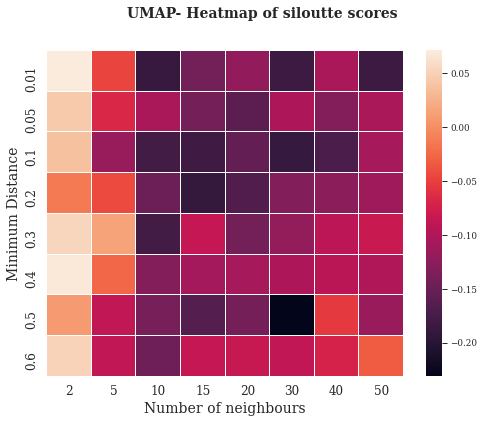

In [8]:
obj_sil = silhouette("umap_seed22/meth", 'cosine')   #Enter path to data for umap or tsne
obj_sil.run_sil("umap")         #enter algorithm used